In [11]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
#from urllib.request import urlretrieve
from scipy.integrate import odeint
import pandas as pd
import numpy as np
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
import sys
#import os

# Enable inline plotting
%matplotlib nbagg
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
#print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Numpy version 1.11.3
Pandas version 0.19.2
Matplotlib version 2.0.0


# 1 часть задания
У нас есть два стержня, свойстами которых мы можем пренебречь. Их длина l и 2l. На их концах закреплены одинаковые по модулю заряды. На каждом стержне один заряд со знаком "+", другой со знаком "-".

Нужно построить граффик изменения угла между стержнями.

In [ ]:
q = 1.
l = 1.


Дормула для подсчёта трека альфы:

$$\begin{cases}
 & \dot{\alpha} = \omega  \\ 
 & \dot{\omega}= \frac{5q^2\sin(\alpha)}{l^3} \left( \frac{1}{(5-4cos(\alpha))^{3/2}} + \frac{1}{(5+4sin(\alpha))^{3/2}} \right)  
\end{cases}$$

In [ ]:
def fun(date, t):
	a = date[0]
	w = date[1]
	d = (w, 
         5*q**2 *sin(a)*(1/(l**3 *(4 *cos(a) + 5))**(3/2) + 1/(-l**3 *(4*cos(a) - 5))**(3/2)))
	return vstack(d).ravel()

In [ ]:
%%time

begin,end = 0,20*np.pi

t = linspace(begin,end, 10 ** 4)
date0 = array([np.pi/2,.0])

result = odeint(fun, date0, t)

plt.figure(figsize=(15,10))

plt.title('График альфа от {} до {} pi.'.format(round(begin,2),round(end/np.pi,2)))
plt.plot(t ,[i[0]/np.pi*180 for i in result])

In [ ]:
%%time

begin,end = 0,1000.0

t = linspace(begin,end, 10 ** 4)
date0 = array([np.pi/2,.0])

result = odeint(fun, date0, t)

plt.figure(figsize=(15,7))

plt.title('График alpha, time от {} до {} pi.\nпо х - alpha (pi). по у - time.'.format(round(begin,2),round(end/np.pi,2)))
plt.plot(t ,result[:,0])

# 2 часть задания

Суть такая. Задача состоит в том, чтобы исследовать устойчивость всей системы относительно начальных данных-а именно скорости и координаты.

Для того, чтобы это исследовать, мы введем несколько новых параметров, которые будем интегрировать, получится, соответственно, несколько новых уравнений

Короче, к системе добавятся 4 новых уравнения.

И уравнения, соответственно:

(дельта)' = J * дельта.
J-это матрица Якоби начальной системы, той, которая со скоростью и углом
А оставшиеся два... Блин. Это некие параметры устойчивости.

Q и dzeta

Q' = ln||delta||

dzeta' = Q/t

Начальное значение дельта берешь произвольно, но в разумных пределах. То есть что-то вроде "ну это что-то маленькое". Начальные значение Q и dzeta-нули

И еще надо будет в каждый момент времени считать для этой системы некий численный критерий устойчивости. Показатель Мегно. 

Y = 2 * (ln||delta|| - Q/t)

и его усредненное значение Ysr=2 * (Q - dzeta)/t

Вот этот вот усредненный должен не превышать двойку, короче
Блин. Тут очень криво все вышло.


________________________________________
## Уравнения

$$ {\delta}' = J * \delta $$
J-это матрица Якоби начальной системы, той, которая со скоростью и углом/

$${Q}' = \ln \left \| \delta \right \|$$
$$ {\zeta}' = \frac{Q}{t}$$ 
$$ Y = 2 * \left (\ \ln \left \| \delta \right \| - \frac{Q}{t} \right )$$
$$ Ysr=2 *  \frac{\left ( Q - \zeta \right )}{t}$$

В формулах что-то напутали, но код работает как нужно по заданию
$$J=\begin{vmatrix}
\frac{\partial {\alpha}' }{\partial \alpha } & \frac{\partial {\alpha}' }{\partial \omega  }\\ 
\frac{\partial {\omega}' }{\partial \alpha } & \frac{\partial {\omega}' }{\partial \omega } \\
\end{vmatrix}$$



$$\frac{\partial {\alpha}' }{\partial \alpha } = 0$$
$$\frac{\partial {\alpha}' }{\partial \omega  } = 1$$
$$\frac{\partial {\omega}' }{\partial \alpha } = \frac{5q^2}{l^3}\left (\cos(a)( \frac{1}{(5 + 4*np.cos(a))^{1.5}} +
                                    \frac{1}{(5 - 4\cos(a))^{1.5}} + 
                                6\sin(a)^2(
                                    \frac{1}{(5 + 4\cos(a))^{2.5}} -
                                    \frac{1}{(5 - 4\cos(a))^{2.5}}\right )$$
$$\frac{\partial {\omega}' }{\partial \omega } = 0$$

In [49]:
 J = lambda a,l,q: [[0,
                            1],
                            [5*q**2/l**3 *(
                                np.cos(a) *(
                                    1./(5 + 4*np.cos(a))**1.5 +
                                    1./(5 - 4*np.cos(a))**1.5) + 
                                6*np.sin(a)**2*(
                                    1./(5 + 4*np.cos(a))**2.5 -
                                    1./(5 - 4*np.cos(a))**2.5)),
                            0]]
    
Jwa = lambda a,l,q : 5*q**2/l**3 *(np.cos(a) *(
                                    1./(5 + 4*np.cos(a))**1.5 +
                                    1./(5 - 4*np.cos(a))**1.5) + 
                                6*np.sin(a)**2*(
                                    1./(5 + 4*np.cos(a))**2.5 -
                                    1./(5 - 4*np.cos(a))**2.5))


def fun_st(date, t):
    a = date[0]
    w = date[1]
    delta0 = date[2]
    delta1 = date[3]
    teta = date[4]
    zeta = date[5]
    
    '''s, k, m, q = 1., 1., 1., 1.
    r = zeros(5)
    r[1] = r[3] = s
    r[2] = r[4] = 2 * s
    rr = zeros((5, 5))
    rr[1, 2] = rr[3, 4] = rr[2, 1] = rr[4, 3] = sqrt(r[1] ** 2 + r[2] ** 2 + 2 * r[1] * r[2] * cos(alpha))
    rr[3, 2] = rr[1, 4] = rr[4, 1] = rr[2, 3] = sqrt(r[1] ** 2 + r[4] ** 2 - 2 * r[1] * r[4] * cos(alpha))
    
    def acc_orth(i, j):
        return k * q ** 2 * r[j] * sin(alpha) / (rr[i, j] ** 3 * m)
    eps_s = (acc_orth(3, 2) + acc_orth(3, 4) +
             acc_orth(1, 2) + acc_orth(1, 4)) / s
    eps_l = (acc_orth(2, 1) + acc_orth(2, 3) +
             acc_orth(4, 1) + acc_orth(4, 3)) / 2 / s
    eps = eps_s + eps_l
    '''
    
    d = array([w, 
         5*q**2/l**3*np.sin(a)*(
             1/(5 + 4*np.cos(a))**1.5 +
             1/(5 - 4*np.cos(a))**1.5),
         Jwa(a,l,q) * delta1,
         1. * delta0,
         log(sqrt(delta0 ** 2 + delta1 ** 2)),
         teta / t,
         ])
    return d

 
    

CPU times: user 4.35 s, sys: 4 ms, total: 4.35 s
Wall time: 4.36 s


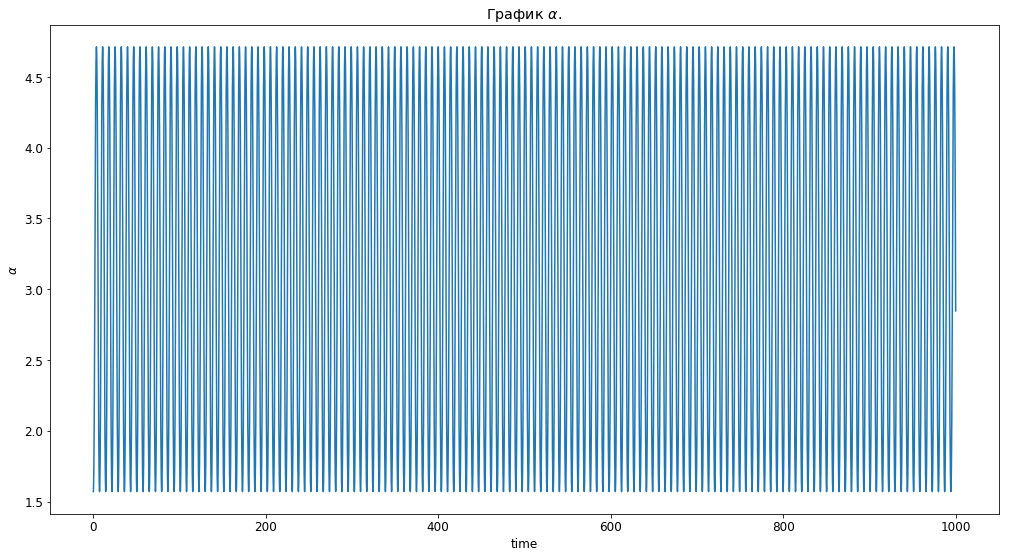

In [62]:
%%time

begin,end = .000001,1000.0

t = linspace(begin,end, 10 ** 5)
date0 = np.array([np.pi/2,
               .0,
               e-10,
               e-10,
               .0,
               .0               
              ])

q = 1.
l = 1.

result2 = odeint(fun_st, date0, t)

plt.figure(figsize=(17,9))

plt.title('График $\\alpha$.'.format(round(begin,2),round(end/np.pi,2)))
plt.plot(t ,result2[:,0])
plt.ylabel(r'$\alpha$')
plt.xlabel('time')

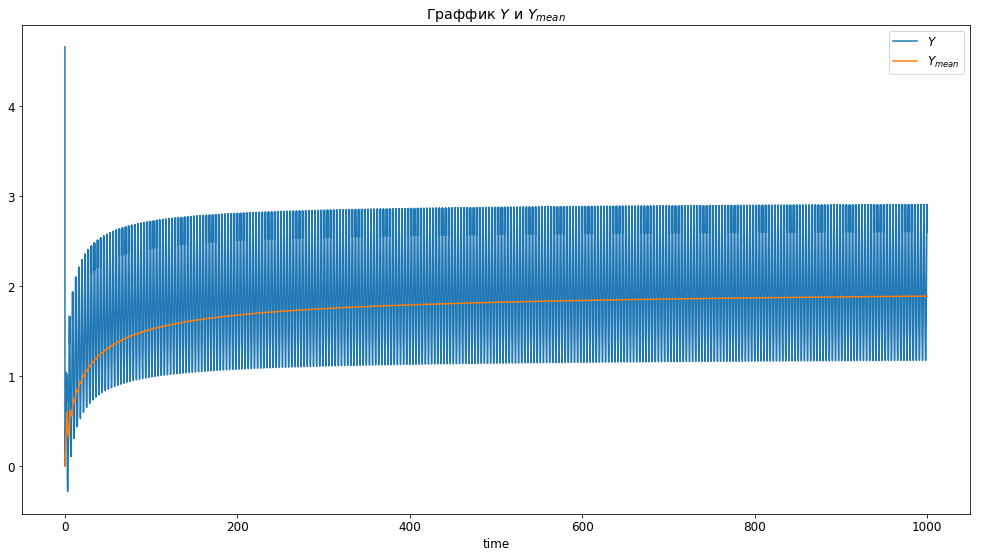

In [63]:
plt.figure(figsize=(17,9))

alphas = array([i[0] % (2 * pi) for i in result2])
delta_norm = [linalg.norm(i[2:4]) for i in result2]

y_true = 2 * (log(delta_norm) - result2[:, 4] / t)
y_mean = 2 * (result2[:, 4] - result2[:, 5]) / t

plt.title('Граффик $Y$ и $Y_{mean}$')
plt.plot(t , y_true,label=r'$Y$')
plt.plot(t , y_mean, label=r'$Y_{mean}$')
plt.xlabel('time')
plt.legend(loc='best')